# Chapter 5: Agent-Based Models and Simulations

## Schelling Model

In [1]:
# Create a list of starting positions for 3 agents
positions = [0, 1, 2]  # Agent 1 starts at 0, Agent 2 at 1, Agent 3 at 2

# Loop over 3 time steps (simulating time passing)
for t in range(3):  # t = 0, 1, 2
    # Move each agent forward by 1 step
    positions = [x + 1 for x in positions]

    # Print the current step and the updated positions of the agents
    print("Step", t, ":", positions)


Step 0 : [1, 2, 3]
Step 1 : [2, 3, 4]
Step 2 : [3, 4, 5]


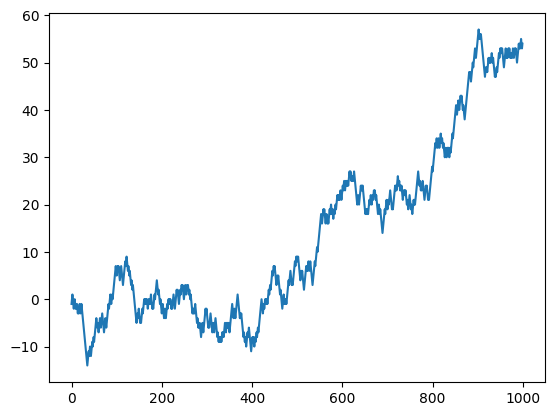

In [2]:
# Random Walk
#  Import functions for generating random numbers and plotting
from random import seed, random
from matplotlib import pyplot

# Set the seed for the random number generator to make results reproducible
seed(1)

# Create an empty list to store the particle's path
RWPath = []

# Append the first step: -1 or +1 with equal probability
RWPath.append(-1 if random() < 0.5 else 1)

# Repeat the process for 999 more steps
for i in range(1, 1000):
    # Randomly choose -1 (left) or +1 (right)
    Z = -1 if random() < 0.5 else 1

    # Add the random step to the previous position
    X = RWPath[i - 1] + Z

    # Store the new position
    RWPath.append(X)

# Plot the random walk path
pyplot.plot(RWPath)

# Show the graph
pyplot.show()


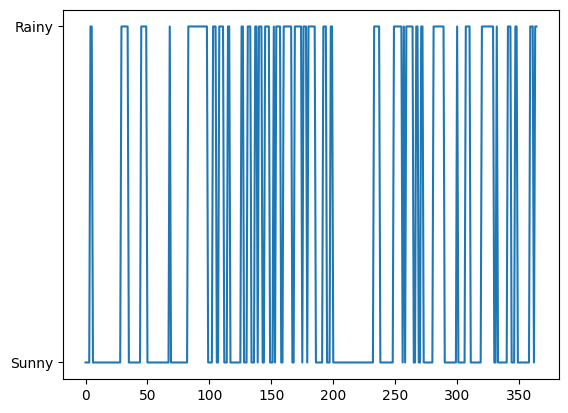

In [3]:
# Weather Prediction
# Import necessary libraries
import numpy as np                # For random choices and arrays
import matplotlib.pyplot as plt   # For plotting results

# Set a random seed to make the simulation reproducible (same results every time)
np.random.seed(3)

# Define possible weather states
States = ["Sunny", "Rainy"]

# Define the transition matrix:
# Row 0: probabilities if today is Sunny → [P(Sunny→Sunny), P(Sunny→Rainy)]
# Row 1: probabilities if today is Rainy → [P(Rainy→Sunny), P(Rainy→Rainy)]
Transition = [
    [0.80, 0.20],
    [0.25, 0.75]
]

# Set the initial weather condition
Today = "Sunny"

# Create a list to store the forecast for each day
Forecast = []

# Simulate the weather for 365 days
for i in range(365):
    # Choose the weather for the next day based on current condition and transition probabilities
    if Today == "Sunny":
        Today = np.random.choice(States, p=Transition[0])
    else:
        Today = np.random.choice(States, p=Transition[1])

    # Add the forecasted weather to the list
    Forecast.append(Today)

# Plot the weather forecast over time
plt.plot(Forecast)
plt.show()


In [1]:
# Two Agents Choosing Tasks.
import random  # Import the random module to use for random task selection

# Define a list of available tasks
tasks = ["A", "B", "C"]

# Randomly assign a task to Agent 1 from the list
agent1 = random.choice(tasks)

# Randomly assign a task to Agent 2 from the same list
agent2 = random.choice(tasks)

# Print the tasks picked by both agents
print("Agent 1 picked:", agent1)
print("Agent 2 picked:", agent2)

# Check if both agents picked the same task (a conflict)
if agent1 == agent2:
    print("Conflict! Both picked the same task.")
else:
    print("No conflict. Tasks assigned.")


Agent 1 picked: C
Agent 2 picked: C
Conflict! Both picked the same task.


In [12]:
# Running the Simulation
import matplotlib.pyplot as plt      # Used to create visual plots (we’ll use it to show agents on a graph)
from random import random            # Provides a way to generate random numbers between 0 and 1

# Define a class to represent each agent in the simulation
class SchAgent:
    def __init__(self, type):        # Constructor: runs when we create a new agent
        self.type = type             # Store the agent's type (0 or 1) - think of it like two different groups
        self.ag_location()           # Assign the agent a random location on the grid

    def ag_location(self):           # Function to randomly place an agent on a 1x1 grid
        self.location = random(), random()  # Assign random (x, y) coordinates between 0 and 1

    def euclidean_distance(self, other):   # Function to calculate distance to another agent
        x1, y1 = self.location             # Current agent’s x and y
        x2, y2 = other.location            # Other agent’s x and y
        # Use the formula for Euclidean distance between two points
        return ((x1 - x2)**2 + (y1 - y2)**2)**0.5

    def satisfaction(self, agents):        # Check if agent is happy with its neighborhood
        neighbors = sorted(                # List of nearby agents sorted by distance
            [(self.euclidean_distance(a), a)  # Make a list of (distance, agent)
             for a in agents if a != self],   # Exclude self from the list
            key=lambda x: x[0]                # Sort based on distance
        )
        # Count how many of the 8 closest neighbors are the same type as this agent
        same_type = sum(self.type == a.type for _, a in neighbors[:8])
        return same_type >= 4                # Agent is happy if at least 4 of 8 neighbors are the same type

    def update(self, agents):                # Try to move agent if it is not happy
        while not self.satisfaction(agents): # While the agent is not satisfied
              self.ag_location()             # Keep moving to a new random location

# Create a list of agents
# First, make 500 agents of type 0
agents = [SchAgent(0) for _ in range(500)]
# Then, add 500 agents of type 1
agents += [SchAgent(1) for _ in range(500)]

# Now all 1000 agents are randomly placed in space, and each tries to find a spot where at least half of its
# 8 nearest neighbors are from the same group.


In [13]:
# Running the Simulation
# Define a function to visualize the agents on a 2D grid
def grid_plot(agents, step):
    # Create four empty lists to hold x and y coordinates for each group (type 0 and type 1)
    x_A, y_A, x_B, y_B = [], [], [], []

    # Loop through each agent in the list
    for agent in agents:
        x, y = agent.location  # Get the x and y coordinates of the agent's location

        if agent.type == 0:        # If the agent is from group A (type 0)
            x_A.append(x)          # Save its x coordinate in x_A
            y_A.append(y)          # Save its y coordinate in y_A
        else:                      # If the agent is from group B (type 1)
            x_B.append(x)          # Save its x coordinate in x_B
            y_B.append(y)          # Save its y coordinate in y_B

    # Set the size of the plot (6x6 inches)
    plt.figure(figsize=(6, 6))

    # Plot agents from group A using blue triangles ('^')
    plt.plot(x_A, y_A, '^', color='blue')

    # Plot agents from group B using red circles ('o')
    plt.plot(x_B, y_B, 'o', color='red')

    # Add a title to the plot showing the current simulation step
    plt.title(f"Step = {step}")

    # Display the plot
    plt.show()


Step 0


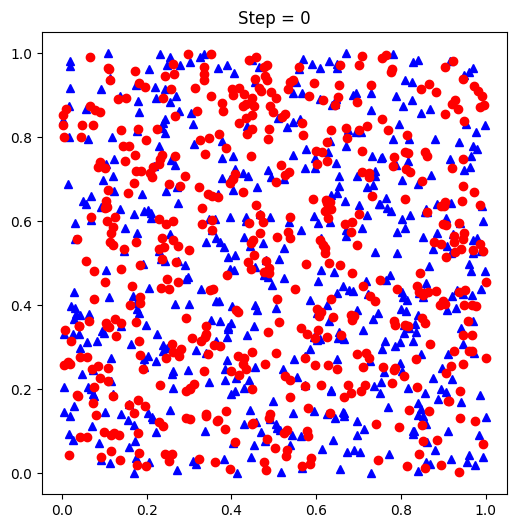

Step 1


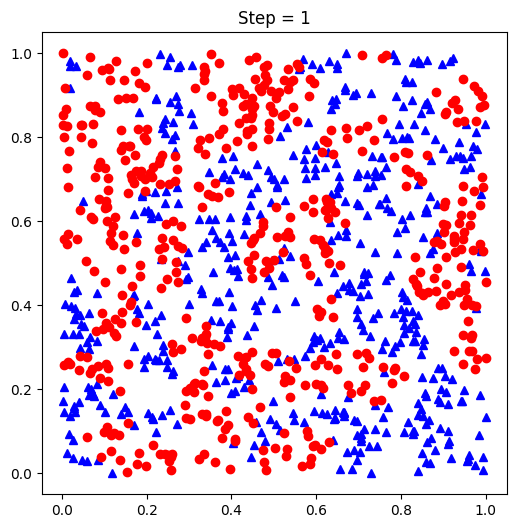

Step 2


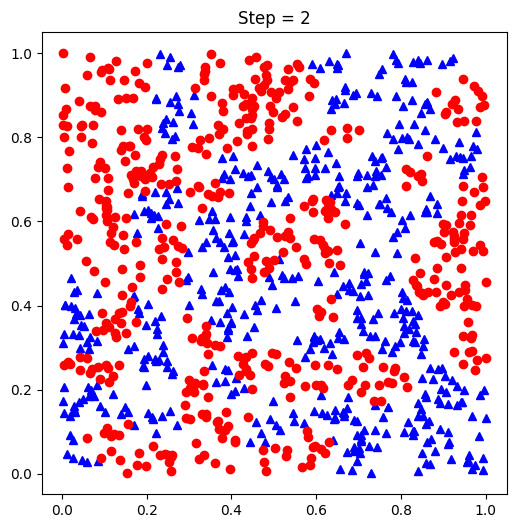

Step 3


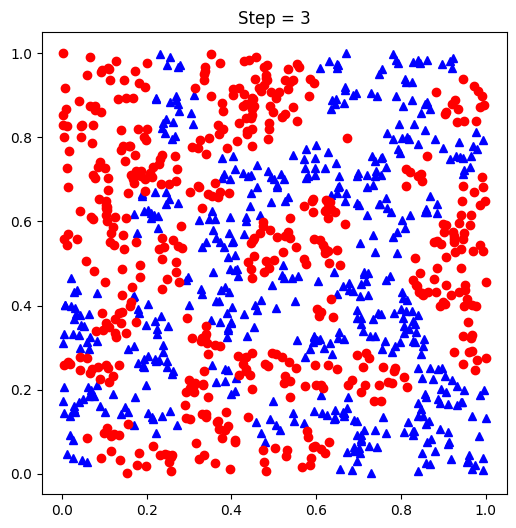

Step 4


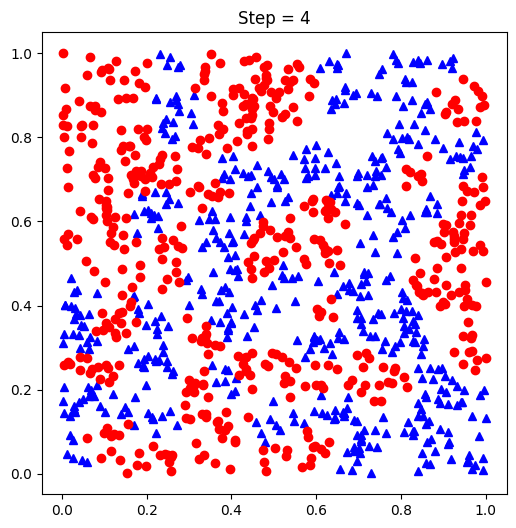

In [14]:
# Running the Simulation
step = 0     # Start counting simulation steps from 0
k = 0        # This will count how many agents are already satisfied (i.e., didn't need to move)

# Keep running the simulation until all agents are satisfied (i.e., no one changes location)
while k < len(agents):   # Continue while not all agents are satisfied
    print("Step", step)       # Print the current simulation step
    grid_plot(agents, step)   # Show the positions of all agents on the grid
    step += 1                 # Move to the next step
    k = 0                     # Reset the count of satisfied agents for this round

    # Go through each agent to update their location if they're not satisfied
    for agent in agents:
        old = agent.location   # Save the agent's current location
        agent.update(agents)   # Try to update the agent’s position (move if not satisfied)

        # If the agent didn’t move, it means they're satisfied with their neighbors
        if agent.location == old:
            k += 1             # Increase the counter of satisfied agents

# When the loop ends, it means all agents are satisfied and the model has reached stability


In [4]:
#  A robot moves between 2 rooms. Actions: stay or switch.
states = [0, 1]         # Two states: room 0 and room 1
V = [0.0, 0.0]          # Initial value function for each room (set to 0)
rewards = [1, 2]        # Immediate rewards for being in room 0 and room 1
gamma = 0.9             # Discount factor (how much future rewards are worth)

# Repeat value updates for 10 iterations
for _ in range(10):
    for s in states:  # For each state (room)
        # Option 1: Stay in the same room
        stay = rewards[s] + gamma * V[s]

        # Option 2: Switch to the other room
        switch = rewards[1 - s] + gamma * V[1 - s]

        # Choose the action (stay or switch) that gives the higher value
        V[s] = max(stay, switch)

# Print the final value of each state after updates
print(V)


[13.857972790184123, 13.857972790184123]


In [ ]:
import matplotlib.pyplot as plt
from random import random

class SchAgent:

    def __init__(self, type):
        self.type = type
        self.ag_location()

    def ag_location(self):
        self.location = random(), random()

    def euclidean_distance(self, new):
        eu_dist = ((self.location[0] - new.location[0])**2 + (self.location[1] - new.location[1])**2)**(1/2)
        return eu_dist

    def satisfaction(self, agents):
        eu_dist = []
        for agent in agents:
            if self != agent:
                eu_distance = self.euclidean_distance(agent)
                eu_dist.append((eu_distance, agent))
        eu_dist.sort()
        neigh_agent = [agent for k, agent in eu_dist[:neigh_num]]
        neigh_itself = sum(self.type == agent.type for agent in neigh_agent)
        return neigh_itself >= neigh_threshold

    def update(self, agents):
        while not self.satisfaction(agents):
            self.ag_location()

def grid_plot(agents, step):
    x_A, y_A = [], []
    x_B, y_B = [], []
    for agent in agents:
        x, y = agent.location
        if agent.type == 0:
            x_A.append(x)
            y_A.append(y)
        else:
            x_B.append(x)
            y_B.append(y)
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.plot(x_A, y_A, '^', markerfacecolor='b', markersize=10)
    ax.plot(x_B, y_B, 'o', markerfacecolor='r', markersize=10)
    ax.set_title(f'Step number = {step}')
    plt.show()

num_agents_A = 500
num_agents_B = 500
neigh_num = 8
neigh_threshold = 4

agents = [SchAgent(0) for i in range(num_agents_A)]
agents.extend(SchAgent(1) for i in range(num_agents_B))

step = 0
k = 0
while (k < (num_agents_A + num_agents_B)):
    print('Step number = ', step)
    grid_plot(agents, step)
    step += 1
    k = 0
    for agent in agents:
        old_location = agent.location
        agent.update(agents)
        if agent.location == old_location:
            k = k + 1
else:
    print(f'Satisfied agents with {neigh_threshold/neigh_num*100} % of similar neighbors')

## Simulating Random Walk

In [ ]:
from random import seed
from random import random
from matplotlib import pyplot

seed(1)
RWPath = list()
RWPath.append(-1 if random() < 0.5 else 1)
for i in range(1, 1000):
    ZNValue = -1 if random() < 0.5 else 1
    XNValue = RWPath[i-1] + ZNValue
    RWPath.append(XNValue)
pyplot.plot(RWPath)
pyplot.show()

## Weather Forecasting

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(3)
StatesData = ['Sunny', 'Rainy']

TransitionStates = [['SuSu', 'SuRa'], ['RaRa', 'RaSu']]
TransitionMatrix = [[0.80, 0.20], [0.25, 0.75]]

WeatherForecasting = list()
NumDays = 365
TodayPrediction = StatesData[0]

print('Weather initial condition =', TodayPrediction)

for i in range(1, NumDays):
    if TodayPrediction == 'Sunny':
        TransCondition = np.random.choice(TransitionStates[0], replace=True, p=TransitionMatrix[0])
        if TransCondition == 'SuSu':
            pass
        else:
            TodayPrediction = 'Rainy'
    elif TodayPrediction == 'Rainy':
        TransCondition = np.random.choice(TransitionStates[1], replace=True, p=TransitionMatrix[1])
        if TransCondition == 'RaRa':
            pass
        else:
            TodayPrediction = 'Sunny'
    WeatherForecasting.append(TodayPrediction)
    print(TodayPrediction)

plt.plot(WeatherForecasting)
plt.show()

plt.figure()
plt.hist(WeatherForecasting)
plt.show()